In [1]:
import pandas as pd
import numpy as np

In [2]:
from sqlalchemy import create_engine, text

In [3]:
import cx_Oracle
import os
os.putenv(' NLS_LANG', '.UTF8')

In [4]:
# import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:
sys.path.append('../py')
import data_processing as proc
import utils
import performance as perf

In [5]:
pd.options.plotting.backend = "plotly"


In [6]:
dsn = cx_Oracle.makedsn('192.168.1.5', '1521', service_name = 'ORA11')
con = cx_Oracle.connect('dbam', 'dbamkass', dsn = dsn, encoding="UTF-8")
cur = con.cursor()

In [7]:
sql_k200 = " select 일자, 종목코드2 종목코드, 종목명_국문 종목명, 당일가격, 지수내비중, 상장주식수, 유동비율, \
            지수주식수, 지수시가총액 \
             from KASS1.TH068 \
             where 익일적용여부 ='NXT' \
             and ISIN = 'KRD020020016' \
             order by 지수내비중 desc "

cur.execute(sql_k200)
k200_df = pd.DataFrame(cur.fetchall(), columns = [x[0] for x in cur.description])

k200_df['일자']=pd.to_datetime(k200_df['일자'], format ='%Y%m%d')
k200_df.set_index(['일자', '종목코드'], inplace=True)
k200_df.index.names=['Dates', 'Symbol']
k200_df.columns=['name', 'close', 'idx_weight', 'num_shares', 'float_rate', 'idx_num_shares', 'idx_cap']
k200_df=k200_df.sort_index(0)

<ipython-input-7-c380e1fc735c>:15: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  k200_df=k200_df.sort_index(0)


In [8]:
host = '192.168.1.27'
port = '3306'
db_name = 'quantdb_maria'
username = 'quantdb'
password = 'QuantDb2023!'

engine = create_engine("mysql+pymysql://" + username + ":" + password + "@" + host + ":" + port + "/" + db_name)
conn=engine.connect()

In [9]:
period1='2023-01-01'
period2='2023-10-31'

In [10]:

query_SSC=f"select * from SSC_table_Bak where Dates>='{period1}' and Dates<='{period2}'"
data_SSC=pd.read_sql(query_SSC, conn)


In [11]:
data_SSC.columns

Index(['Dates', 'Symbol', 'Name', 'MNGT', 'ClosePrc', 'OpenPrc', 'HighPrc',
       'LowPrc', 'AdjPrc', 'AdjPrc2', 'AdjPrc_High_20D', 'AdjPrc_Low_20D',
       'AdjPrc_High_60D', 'AdjPrc_Low_60D', 'AdjPrc_High_120D',
       'AdjPrc_Low_120D', 'AdjPrc_High_52W', 'AdjPrc_Low_52W', 'ListedShares',
       'ForeignStake', 'TradeStop', 'MktCap_Comm_Pref', 'MktCapCom', 'MktCap',
       'Volume', 'Volume_Avg_20D', 'Volume_Avg_60D', 'Volume_Avg_120D',
       'Volume_Avg_52W', 'Amt_Avg_20D', 'Amt_Avg_60D', 'Amt_Avg_120D',
       'Amt_Avg_52W', 'Vol_20D', 'Vol_120D'],
      dtype='object')

In [12]:
query_COM=f"select * from COM_table_Bak where Dates>='{period1}' and Dates<='{period2}'"
data_COM=pd.read_sql(query_COM, conn)

In [13]:
data_COM.set_index(['Dates','Symbol'], inplace=True)

In [14]:
data_COM.columns

Index(['Name', 'KC_Industry', 'FG_IndustryGroup27', 'FG_Sector_Idx',
       'FG_IndustryGroup_Idx', 'FG_Industry_Idx', 'AuditOpinion', 'Caution',
       'KSECapSize', 'KLCAIndustry', 'Market', 'KOSPI200YN', 'FiscalMonth'],
      dtype='object')

In [206]:
stock_names=data_COM.loc[data_COM.index.get_level_values(0)==period2, 'Name']
stock_names.reset_index(level=0, drop=True, inplace=True)

In [15]:
k200comp=data_COM['KOSPI200YN'].unstack()

In [93]:
query_idx=f"select * from krx_idx"
krx_idx=pd.read_sql(query_idx, conn)

In [94]:
krx_idx.columns

Index(['Symbol Name', '코스피', '코스피 200', '코스피 100', '코스피 50', '코스닥 150', '코스닥',
       '코스피 200 동일가중', '코스피 대형주', '코스피 중형주', '코스피 소형주', '코스피 음식료품',
       '코스피 섬유,의복', '코스피 종이,목재', '코스피 화학', '코스피 의약품', '코스피 비금속광물', '코스피 철강및금속',
       '코스피 기계', '코스피 전기,전자', '코스피 의료정밀', '코스피 운수장비', '코스피 유통업', '코스피 전기가스업',
       '코스피 건설업', '코스피 운수창고', '코스피 통신업', '코스피 금융업', '코스피 증권', '코스피 보험',
       '코스피 서비스업', '코스피 제조업', '코스피 고배당 50 TR', '코스피 배당성장 50 TR', '코스피 우선주지수',
       '코스피 200 총수익지수', '코스피 200 중소형주', '코스피 200 건설 TR', '코스피 200 중공업 TR',
       '코스피 200 철강소재 TR', '코스피 200 에너지화학 TR', '코스피 200 정보기술 TR',
       '코스피 200 금융 TR', '코스피 200 생활소비재 TR', '코스피 200 경기소비재 TR',
       '코스피 200 산업재 TR', '코스피 200 헬스케어 TR', '코스피 200 커뮤니케이션서비스 TR',
       '코스피 200 ESG 지수'],
      dtype='object')

In [95]:
krx_idx.set_index('Symbol Name', inplace=True)

In [96]:
krx_idx=krx_idx.loc[:period2]

In [97]:
bm_ret=krx_idx[['코스피 200', '코스피 200 동일가중']].pct_change()

In [98]:
bm_ret.index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2023-10-18', '2023-10-19', '2023-10-20', '2023-10-23',
               '2023-10-24', '2023-10-25', '2023-10-26', '2023-10-27',
               '2023-10-30', '2023-10-31'],
              dtype='datetime64[ns]', name='Symbol Name', length=5882, freq=None)

In [62]:
data_SSC.set_index(['Dates', 'Symbol'], inplace=True)

KeyError: "None of ['Dates', 'Symbol'] are in the columns"

In [63]:
prc=data_SSC['AdjPrc']

In [64]:
prc=prc.unstack()

In [65]:
prc

Symbol,A000010,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000090,A000100,...,A453340,A456040,A457190,A900030,A900050,A900140,A950010,A950070,A950100,A950210
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-02,None,9500,None,561,10900,48400,67000,24400,None,56400,...,None,None,None,None,None,1781,None,None,None,7180
2023-01-03,None,9200,None,553,10600,47050,67100,24100,None,55600,...,None,None,None,None,None,1798,None,None,None,7180
2023-01-04,None,9330,None,551,10600,48500,68600,24150,None,55200,...,None,None,None,None,None,1795,None,None,None,7270
2023-01-05,None,9350,None,549,10550,46750,70000,24100,None,54800,...,None,None,None,None,None,1785,None,None,None,7250
2023-01-06,None,9410,None,549,10650,45600,69300,24250,None,54700,...,None,None,None,None,None,1791,None,None,None,7170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-25,None,9570,None,571,7730,None,69800,21250,None,57600,...,11380,104500,146600,None,None,2200,None,None,None,10160
2023-10-26,None,9320,None,550,7770,None,68400,20950,None,56200,...,11330,101700,130700,None,None,2145,None,None,None,10000
2023-10-27,None,9520,None,541,8000,None,68100,21050,None,56800,...,11280,104600,126200,None,None,2165,None,None,None,10030


In [66]:
prc.shape

(204, 1198)

In [67]:
prc=prc.astype(float)

In [68]:
ret=prc.pct_change()

In [100]:
ret_excess=ret.subtract(bm_ret['코스피 200'], axis=0).dropna(how='all')

In [101]:
ret.index, bm_ret.index

(DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
                '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
                '2023-01-12', '2023-01-13',
                ...
                '2023-10-18', '2023-10-19', '2023-10-20', '2023-10-23',
                '2023-10-24', '2023-10-25', '2023-10-26', '2023-10-27',
                '2023-10-30', '2023-10-31'],
               dtype='datetime64[ns]', name='Dates', length=204, freq=None),
 DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
                '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
                '2000-01-14', '2000-01-17',
                ...
                '2023-10-18', '2023-10-19', '2023-10-20', '2023-10-23',
                '2023-10-24', '2023-10-25', '2023-10-26', '2023-10-27',
                '2023-10-30', '2023-10-31'],
               dtype='datetime64[ns]', name='Symbol Name', length=5882, freq=None))

In [102]:
eom=['2023-02-28', '2023-03-31', '2023-04-28', '2023-05-31', '2023-06-30', 
     '2023-07-31', '2023-08-31', '2023-09-27', '2023-10-31']

In [103]:
data_path='../data/output/weight/'
mlq_w=pd.read_excel(data_path + 'monthly_port.xlsx', index_col=0)

In [104]:
mlq_w

,code,weights,name
dates,,,
2023-02-28,A001040,0.009461,CJ
2023-02-28,A096770,0.009461,SK이노베이션
2023-02-28,A006260,0.009461,LS
2023-02-28,A011790,0.009461,SKC
2023-02-28,A016380,0.009461,KG스틸
...,...,...,...
2023-10-31,A006800,0.009396,미래에셋증권
2023-10-31,A086280,0.009396,현대글로비스
2023-10-31,A178920,0.009396,PI첨단소재


In [105]:
mlq_w=mlq_w[mlq_w.index.isin(eom)]
mlq_w_df=mlq_w[['code', 'weights']].pivot_table(index='dates', columns='code').copy()
mlq_w_df.reset_index(inplace=True)

<ipython-input-106-8af0e4fa815a>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



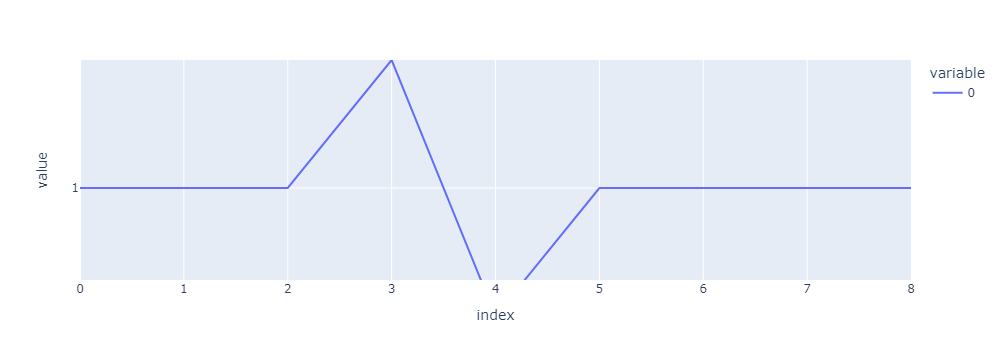

In [106]:
mlq_w_df.sum(1).plot()

In [107]:
eom

['2023-02-28',
 '2023-03-31',
 '2023-04-28',
 '2023-05-31',
 '2023-06-30',
 '2023-07-31',
 '2023-08-31',
 '2023-09-27',
 '2023-10-31']

In [108]:
mlq_w

,code,weights,name
dates,,,
2023-02-28,A001040,0.009461,CJ
2023-02-28,A096770,0.009461,SK이노베이션
2023-02-28,A006260,0.009461,LS
2023-02-28,A011790,0.009461,SKC
2023-02-28,A016380,0.009461,KG스틸
...,...,...,...
2023-10-31,A006800,0.009396,미래에셋증권
2023-10-31,A086280,0.009396,현대글로비스
2023-10-31,A178920,0.009396,PI첨단소재


In [109]:
mlq_w_df['new_dates']=eom

In [110]:
mlq_w_df.set_index('new_dates', inplace=True)
mlq_w_df.drop(columns=['dates'], inplace=True)

<ipython-input-110-732f543c0a98>:2: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [111]:
mlq_w_df.columns=mlq_w_df.columns.get_level_values(1)
mlq_w_df.index=pd.to_datetime(mlq_w_df.index)
mlq_w_df=mlq_w_df.fillna(0)
daily_w=pd.DataFrame(None, columns=mlq_w_df.columns, index=ret.loc[mlq_w_df.index[0]:].index)
daily_w.loc[mlq_w_df.index]=mlq_w_df
daily_w.fillna(method='ffill', inplace=True)
daily_w=daily_w.shift(1)

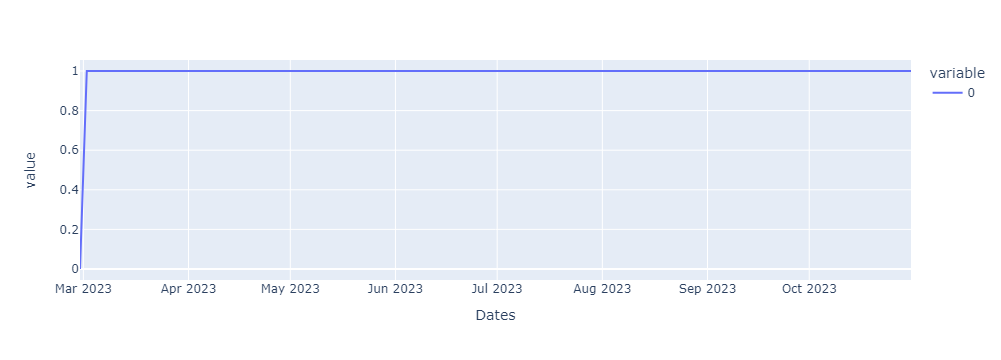

In [119]:
daily_w.sum(1).plot()

In [121]:
mlq_ret=daily_w*ret_excess.loc[daily_w.index]
mlq_idx_ret=mlq_ret.sum(1)

In [124]:
idx_ret, idx_ret_cost, idx_cum_ret, idx_cum_retcost = perf.return_index(prc.loc[daily_w.index[0]:], 
                                                                        daily_w.fillna(0), 
                                                                        cost=.003)

In [125]:
model_ret=pd.read_excel(data_path+'ret_strat.xlsx', index_col=0)

In [126]:
model_ret

,mfm,mfm_emp,dynamic
2023-01-02,-0.008779,-0.007292,-0.006716
2023-01-03,0.001826,-0.000216,-0.000291
2023-01-04,0.019695,0.015465,0.018791
2023-01-05,0.001663,0.004127,0.004887
2023-01-06,0.014489,0.009787,0.012526
...,...,...,...
2023-10-25,NaN,NaN,-0.003267
2023-10-26,NaN,NaN,-0.027196
2023-10-27,NaN,NaN,0.003322
2023-10-30,NaN,NaN,0.005067


In [127]:
final_ret=pd.concat([model_ret['dynamic'], idx_ret_cost, bm_ret], axis=1).dropna()
final_ret.columns=['dynamic', 'mlq', 'k200', 'k200ew'] # 'mfm', 'mfm_emp', 
k200_ret_excess=final_ret[['dynamic', 'mlq']].subtract(final_ret['k200'], axis=0) # 'mfm', 'mfm_emp', 
k200ew_ret_excess=final_ret[['dynamic', 'mlq']].subtract(final_ret['k200ew'], axis=0) # 'mfm', 'mfm_emp', 

In [128]:
final_cumret=((1+k200_ret_excess).cumprod()-1)
final_cumret_ew=((1+k200ew_ret_excess).cumprod()-1)


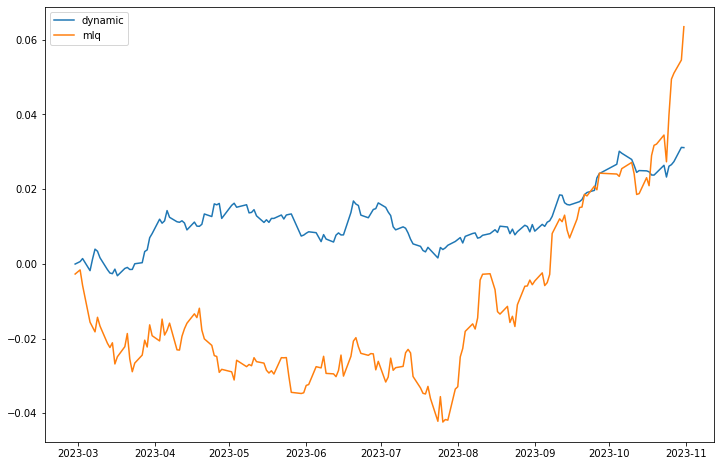

In [132]:
fig, ax1=plt.subplots(figsize=(12, 8))

for col in k200_ret_excess.columns:
    # final_value = final_cumret[col].iloc[-12]
    plt.plot(k200_ret_excess.index, final_cumret[col], label=col)
    # plt.text(final_cumret.index[-12], final_value, col, fontsize=14, va='bottom')

plt.legend()

In [133]:
# temp_perf0 = perf.analyze_performance(final_ret['mfm'], 
#                                      model_name = 'mfm',
#                                      bm_return=final_ret['k200'])

# temp_perf1 = perf.analyze_performance(final_ret['mfm_emp'], 
#                                      model_name = 'mfm_emp',
#                                      bm_return=final_ret['k200'])

temp_perf2 = perf.analyze_performance(final_ret['dynamic'], 
                                     model_name = 'dynamic',
                                     bm_return=final_ret['k200'])

temp_perf3 = perf.analyze_performance(final_ret['mlq'],
                                     # weights = daily_w,
                                     model_name = 'mlq',
                                     bm_return=final_ret['k200'])

In [134]:
pd.concat([temp_perf2, temp_perf3]).T # temp_perf0, temp_perf1, 

,dynamic,mlq
cum return(%),3.11,6.35
cagr(%),4.79,9.86
vol(te),0.03,0.06
sharpe(ir),1.78,1.63
mdd(%),-1.5,-4.08
turnover(%),0,0
start date,2023-02-28 00:00:00,2023-02-28 00:00:00
end date,2023-10-31 00:00:00,2023-10-31 00:00:00


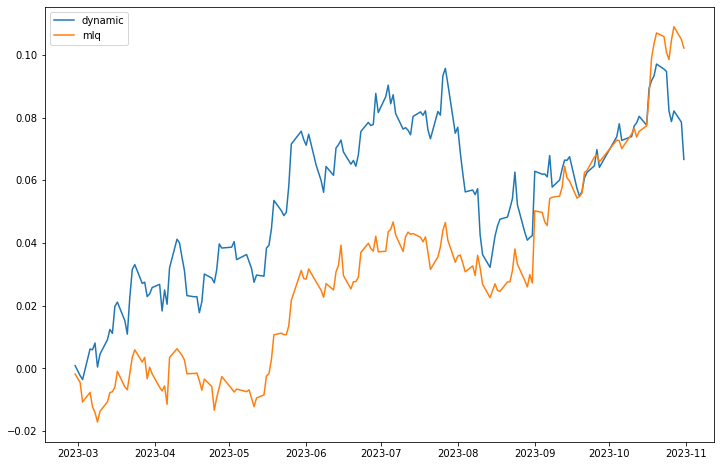

In [135]:
fig, ax1=plt.subplots(figsize=(12, 8))

for col in k200ew_ret_excess.columns:
    plt.plot(k200ew_ret_excess.index, final_cumret_ew[col], label=col)

    # final_value = final_cumret_ew[col].iloc[-12]
    # plt.text(final_cumret_ew.index[-12], final_value, col, fontsize=14, va='bottom')
    
plt.legend()

In [136]:
# temp_perf0 = perf.analyze_performance(final_ret['mfm'], 
#                                      model_name = 'mfm',
#                                      bm_return=final_ret['k200ew'])

# temp_perf1 = perf.analyze_performance(final_ret['mfm_emp'], 
#                                      model_name = 'mfm_emp',
#                                      bm_return=final_ret['k200ew'])

temp_perf2 = perf.analyze_performance(final_ret['dynamic'], 
                                     model_name = 'dynamic',
                                     bm_return=final_ret['k200ew'])

temp_perf3 = perf.analyze_performance(final_ret['mlq'],
                                     # weights = daily_w,
                                     model_name = 'mlq',
                                     bm_return=final_ret['k200ew'])

In [137]:
pd.concat([temp_perf2, temp_perf3]).T # temp_perf0, temp_perf1, 

,dynamic,mlq
cum return(%),6.66,10.22
cagr(%),10.35,16.01
vol(te),0.09,0.07
sharpe(ir),1.2,2.32
mdd(%),-5.79,-2.31
turnover(%),0,0
start date,2023-02-28 00:00:00,2023-02-28 00:00:00
end date,2023-10-31 00:00:00,2023-10-31 00:00:00


In [138]:
w_diff=abs(daily_w.diff(1))
np.sum(w_diff).sum()

4.36129337505927

In [139]:
np.sum(w_diff).sum()**(1/(len(w_diff.index)-1)*252)

9.61221580021587

In [140]:
k200_ret_excess

,dynamic,mlq
2023-02-28,-0.000062,-0.002739
2023-03-02,0.000653,0.001117
2023-03-03,0.000816,-0.004172
2023-03-06,-0.003231,-0.009897
2023-03-07,0.003088,-0.001329
...,...,...
2023-10-25,0.002825,0.012169
2023-10-26,0.000419,0.009268
2023-10-27,0.000788,0.001518
2023-10-30,0.003706,0.003346


2023-03-31 00:00:00
2023-04-28 00:00:00
2023-05-31 00:00:00
2023-06-30 00:00:00
2023-07-31 00:00:00
2023-08-31 00:00:00
2023-09-27 00:00:00
2023-10-31 00:00:00


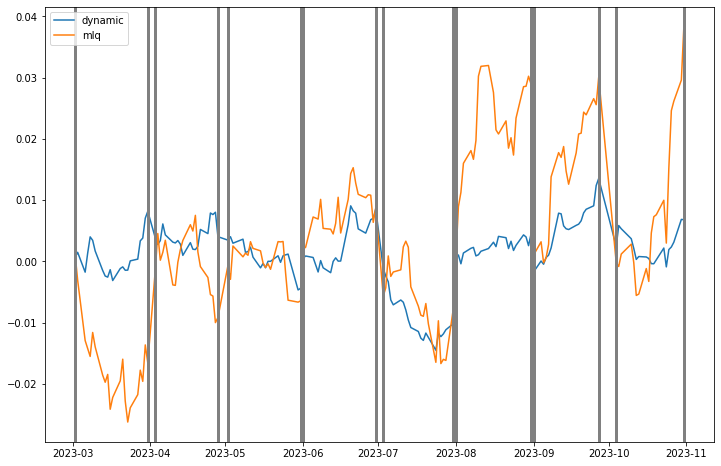

In [141]:
cumret_ls=[]
lastret_ls=[]
bm_ls=[]
init_ls=[]
end_ls=[]

temp_eom=k200_ret_excess.index+pd.offsets.MonthEnd(0)
temp_eom=temp_eom.unique()
for idx in temp_eom[1:]:
    
    temp_df = k200_ret_excess.loc[k200_ret_excess.index.to_period('M')==idx.to_period('M')]
    temp_cum_ret=(1+temp_df).cumprod()-1
    
    temp_bm=bm_ret.loc[bm_ret.index.to_period('M')==idx.to_period('M')]           
    temp_bm_ret=(1+temp_bm).cumprod()-1
    
    if temp_cum_ret.index[-1] not in init_ls:
        init_ls.append(temp_cum_ret.index[-1])
        end_ls.append(temp_cum_ret.index[0])
        
        bm_ls.append(temp_bm_ret)
        cumret_ls.append(temp_cum_ret)
        lastret_ls.append(temp_cum_ret.iloc[-1])
                

bm_ret_m=pd.concat(bm_ls) #.sort_index()
ret_m=pd.concat(cumret_ls) #.sort_index()

# ret_bm_m=pd.concat([ret_m, bm_ret_m], axis=1).dropna()
# ret_bm_m.columns=['dynamic', 'mlq', 'k200', 'k200ew'] # 'mfm', 'mfm_emp', 


fig, ax1=plt.subplots(figsize=(12, 8))

for col in ret_m.columns:
    plt.plot(ret_m.index, ret_m.loc[:, col], label=col)
    # plt.plot(ret_bm_m.index, ret_bm_m.iloc[:, -1], linewidth=2.5, linestyle='--')

for j, vl in enumerate(init_ls):
    print(vl)
    plt.axvline(x=vl, color='gray', linestyle='-', linewidth=3)
    plt.axvline(x=end_ls[j], color='gray', linestyle='-', linewidth=3)
    
# for col in ret_bm_m.columns:
    # final_value = ret_bm_m[col].iloc[-12]
    # plt.text(temp_cum_ret.index[-12], final_value, col, fontsize=14, va='bottom')
    # plt.text(1, y[i], str(txt), ha='center', va='bottom', fontsize=10, loc='best')

plt.legend()
plt.show()

In [142]:
month_endret=pd.concat(lastret_ls, axis=1).T
month_endret

,dynamic,mlq
2023-03-31,0.008161,-0.016559
2023-04-28,0.004024,-0.009174
2023-05-31,-0.004404,-0.006459
2023-06-30,0.008547,0.008716
2023-07-31,-0.010163,-0.007635
2023-08-31,0.004498,0.028920
2023-09-27,0.013514,0.030034
2023-10-31,0.006785,0.038293


In [143]:
month_endret.index.name='Dates'

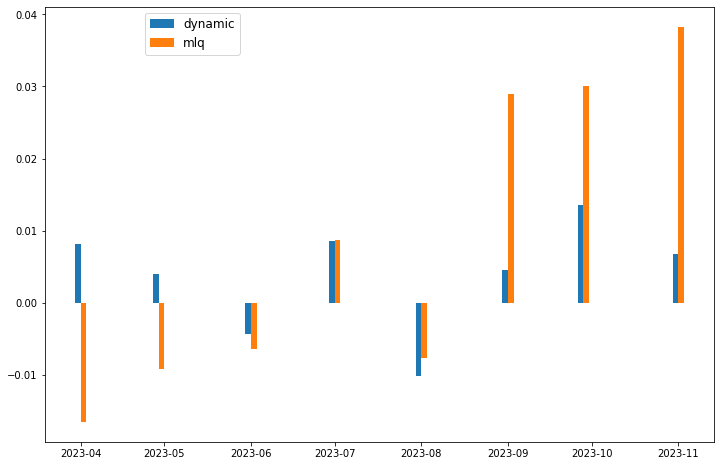

In [144]:
# plt.figure(figsize=(12, 8))
fig, ax = plt.subplots(figsize = (12, 8))

for i, col in enumerate(month_endret.columns):
    plt.bar(month_endret.index + pd.DateOffset(days=i*2), month_endret[col], 2)
    
ax.legend(labels = month_endret.columns,
      fontsize = 12,
      title_fontsize = 18)
ax.legend_.set_bbox_to_anchor([0.3, 1])
    

# correlation among strategy & factors

In [145]:
k200_ret_excess.corr()

,dynamic,mlq
dynamic,1.000000,0.307295
mlq,0.307295,1.000000


<AxesSubplot: >

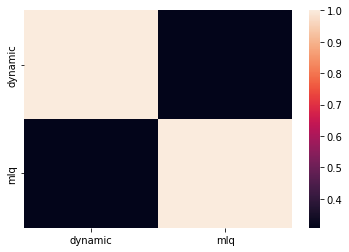

In [146]:
sns.heatmap(k200_ret_excess.corr())

### factor exposure & return contribution

# market cap in port components

### compute cap and sector exposture 

In [147]:
ret_excess.index.name='Dates'

In [148]:
eom

['2023-02-28',
 '2023-03-31',
 '2023-04-28',
 '2023-05-31',
 '2023-06-30',
 '2023-07-31',
 '2023-08-31',
 '2023-09-27',
 '2023-10-31']

In [149]:
w_ret=pd.concat([daily_w.stack(), ret_excess.stack()], axis=1)
w_ret.columns=['weight', 'ret']
w_ret['weighted_ret']=w_ret['weight'] * w_ret['ret']

cap_classified=data_COM['KSECapSize']
# cap=data_SSC['MktCap']
cap=k200_df['idx_weight']
sector=data_COM['FG_IndustryGroup_Idx']

cap_combined=pd.concat([cap_classified, cap, sector, w_ret], axis=1)
cap_combined['idx_weight']=cap_combined['idx_weight']/100
cap_combined['idx_weight_ret']=cap_combined['idx_weight']*cap_combined['ret']

# use actual weight not count???
bm_cap_ls=[]
port_cap_ls=[]
weight_diff_ls=[]

bm_sector_cap_ls=[]
port_sector_cap_ls=[]
sector_weight_diff_ls=[]

bm_sector_ret_ls=[]
port_sector_ret_ls=[]

for i, date in enumerate(eom):
    
    # selected_idx=pd.MultiIndex.from_product([[date], daily_w.loc[date][daily_w.loc[date]>0].index]) 
    # selected_idx=cap_combined[cap_combined[0]>0].index
    
    # select k200 stocks 
    # sum weight by CapSize at the end of month (this weight for the next month)
    # diff of capSize weight btw bm and port
    bm_cap_weight=cap_combined.loc[date][k200comp.loc[date]=='Y'].groupby('KSECapSize').sum(numeric_only=True)['idx_weight']
    port_cap_weight=cap_combined.loc[date][cap_combined.loc[date]['weight']>0].groupby('KSECapSize').sum(numeric_only=True)['weight']
    weight_diff=port_cap_weight-bm_cap_weight
    
    # select k200 stocks 
    # sum weights by sector at the end of month 
    # diff of sector weight btw bm and port 
    bm_sector_weight=cap_combined.loc[date][k200comp.loc[date]=='Y'].groupby('FG_IndustryGroup_Idx').sum(numeric_only=True)['idx_weight']
    port_sector_weight=cap_combined.loc[date][cap_combined.loc[date]['weight']>0].groupby('FG_IndustryGroup_Idx').sum(numeric_only=True)['weight']
    sector_df=pd.concat([port_sector_weight, bm_sector_weight], axis=1) 
    sector_df['weight_diff']=sector_df['weight'].fillna(0)-sector_df['idx_weight']
    
    # select the entire month data
    monthly_cap_combined=cap_combined[cap_combined.index.get_level_values(0).to_period('M')==(pd.to_datetime(date).to_period('M'))]

    # get the cumret of index sector return
    temp_sec_idx_weighted_ret=monthly_cap_combined.groupby(['Dates', 'FG_IndustryGroup_Idx']).sum(numeric_only=True)['idx_weight_ret']
    temp_sec_idx_weighted_ret=temp_sec_idx_weighted_ret.unstack()
    monthly_sec_idx_weighted_ret=((1+temp_sec_idx_weighted_ret).cumprod()-1).iloc[-1]

    # get the cumret of port sector return
    temp_sec_weighted_ret=monthly_cap_combined.groupby(['Dates', 'FG_IndustryGroup_Idx']).sum(numeric_only=True)['weighted_ret']
    temp_sec_weighted_ret=temp_sec_weighted_ret.unstack()
    monthly_sec_weighted_ret=((1+temp_sec_weighted_ret).cumprod()-1).iloc[-1]
    
    bm_cap_ls.append(bm_cap_weight)
    port_cap_ls.append(port_cap_weight)
    weight_diff_ls.append(weight_diff)
    
    bm_sector_cap_ls.append(bm_sector_weight)
    port_sector_cap_ls.append(port_sector_weight)
    sector_weight_diff_ls.append(sector_df['weight_diff'])
    
    bm_sector_ret_ls.append(monthly_sec_idx_weighted_ret)
    port_sector_ret_ls.append(monthly_sec_weighted_ret)

# compute cap difference and BM cap weight
weight_diff_ts=pd.concat(weight_diff_ls, axis=1)
weight_diff_ts.columns=eom
weight_diff_ts=weight_diff_ts.T
weight_diff_ts.columns=['Large', 'Mid']

bm_weight_ts=pd.concat(bm_cap_ls, axis=1)
bm_weight_ts.columns=eom
bm_weight_ts=bm_weight_ts.T
bm_weight_ts.columns=['Large', 'Mid']

# compute sector weight diff and 
sector_weight_diff_ts=pd.concat(sector_weight_diff_ls, axis=1)
sector_weight_diff_ts.columns=eom
sector_weight_diff_ts=sector_weight_diff_ts.T

<ipython-input-149-e1d4c6ef82c0>:34: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-149-e1d4c6ef82c0>:41: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-149-e1d4c6ef82c0>:34: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-149-e1d4c6ef82c0>:41: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-149-e1d4c6ef82c0>:34: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-149-e1d4c6ef82c0>:41: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-149-e1d4c6ef82c0>:34: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-149-e1d4c6ef82c0>:41: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-149-e1d4c6ef82c0>:34: UserWarning:

Boolean Series key will be re

In [231]:
monthly_cap_combined

KSECapSize  idx_weight FG_IndustryGroup_Idx  weight  \
Dates                                                                    
2023-10-04 A005930    코스피 대형주      0.3068                  반도체  0.3047   
           A373220    코스피 대형주      0.0154                 하드웨어  0.0000   
           A000660    코스피 대형주      0.0624                  반도체  0.0000   
           A207940    코스피 대형주      0.0104             제약 및 바이오  0.0000   
           A051910    코스피 대형주      0.0215                   소재  0.0000   
...                       ...         ...                  ...     ...   
2023-10-31 A950100         제외         NaN                 None     NaN   
           A018360         제외         NaN                 None     NaN   
           A011400         제외         NaN                 None     NaN   
           A009280         제외         NaN                 None     NaN   
           A010150         제외         NaN                 None     NaN   

                         ret  weighted_ret  idx_weight_ret  
Dates                                                       
2023-10-04 A005930  0.009064      0.002762        0.002781  
           A373220 -0.020800     -0.000000       -0.000320  
           A000660  0.028324      0.000000        0.001767  
           A207940  0.036906      0.000000        0.000384  
           A051910  0.001074      0.000000        0.000023  
...                      ...           ...             ...  
2023-10-31 A950100       NaN           NaN             NaN  
           A018360  0.002749           NaN             NaN  
           A011400  0.010973           NaN             NaN  
           A009280  0.010973           NaN             NaN  
           A010150       NaN           NaN             NaN  

[22762 rows x 7 columns]

In [150]:
# sector_name=[
#     'Durable Consumer Goods and Apparel',
#     'Display',
#     'Media',
#     'Semiconductors',
#     'Insurance',
#     'Commercial Services',
#     'Consumer Goods',
#     'Consumer Services',
#     'Materials',
#     'Software',
#     'Energy',
#     'Transportation',
#     'Retail',
#     'Utilities',
#     'Banking',
#     'Food and Tobacco',
#     'Automobiles and Parts',
#     'Capital Goods',
#     'Pharmaceuticals and Biotechnology',
#     'Financial Services',
#     'Hardware',
#     'Other Financials',
#     'Health Care Equipment and Services',
#     'Telecommunications Services'
# ]

sector_dict={
    '내구 소비재 및 의류': 'Durable Consumer Goods and Apparel',
    '디스플레이': 'Display',
    '미디어': 'Media',
    '반도체' : 'Semiconductors',
    '보험' : 'Insurance',
    '상업서비스' : 'Commercial Services',
    '생활용품' : 'Consumer Goods',
    '소비자 서비스' : 'Consumer Services',
    '소재' : 'Materials',
    '소프트웨어' : 'Software',
    '에너지' : 'Energy',
    '운송' : 'Transportation',
    '유통' : 'Retail',
    '유틸리티' : 'Utilities',
    '은행' : 'Banking',
    '음식료 및 담배' : 'Food and Tobacco',
    '자동차 및 부품' : 'Automobiles and Parts',
    '자본재' : 'Capital Goods',
    '제약 및 바이오' : 'Pharmaceuticals and Biotechnology',
    '증권' : 'Financial Services',
    '하드웨어' : 'Hardware',
    '기타금융': 'Other Financials',
    '의료장비 및 서비스' : 'Health Care Equipment and Services',
    '통신서비스': 'Telecommunications Services'
}


### sector exposure & contribution

In [160]:
port_sector_weight

FG_IndustryGroup_Idx
기타금융           0.009396
내구 소비재 및 의류    0.075168
미디어            0.009396
반도체            0.314096
상업서비스          0.018792
소비자 서비스        0.009396
소재             0.084564
소프트웨어          0.009396
에너지            0.009396
운송             0.056376
유통             0.046980
유틸리티           0.018792
은행             0.065772
음식료 및 담배       0.065772
자동차 및 부품       0.046980
자본재            0.056376
제약 및 바이오       0.037584
증권             0.046980
통신서비스          0.018792
Name: weight, dtype: float64

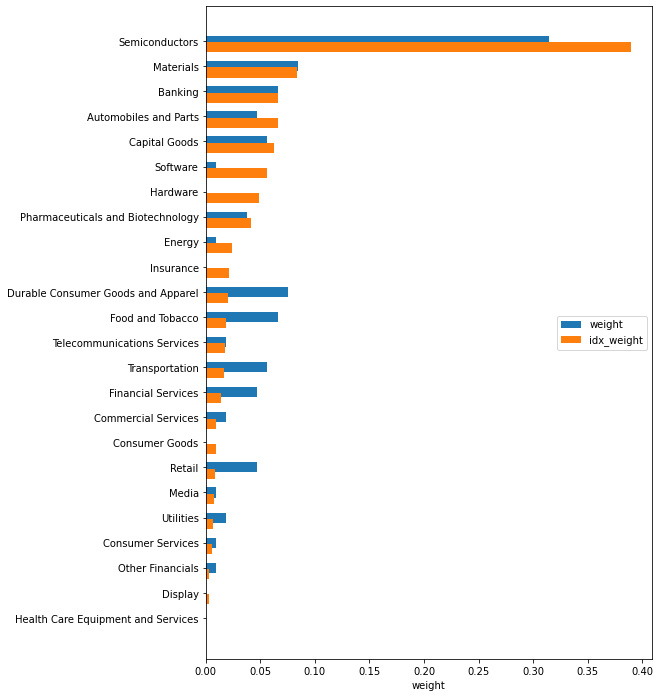

In [155]:
compare_sectors=pd.concat([port_sector_weight, bm_sector_weight], axis=1)
new_idx=[]
for item in compare_sectors.index:
    new_idx.append(sector_dict[item])
compare_sectors.index = new_idx

fig, ax = plt.subplots(figsize = (8, 12))

compare_sectors=compare_sectors.sort_values('idx_weight', ascending=False)

y_pos = np.arange(len(compare_sectors.index)*2, step=2)

ax.barh(y_pos, compare_sectors.iloc[:, 0], align='center', label=compare_sectors.columns[0])
ax.barh(y_pos+.5, compare_sectors.iloc[:, 1], align='center', label=compare_sectors.columns[1])
ax.set_yticks(y_pos, labels=compare_sectors.index)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('weight')

plt.legend()
plt.show()

In [241]:
sector.unique().shape

(26,)

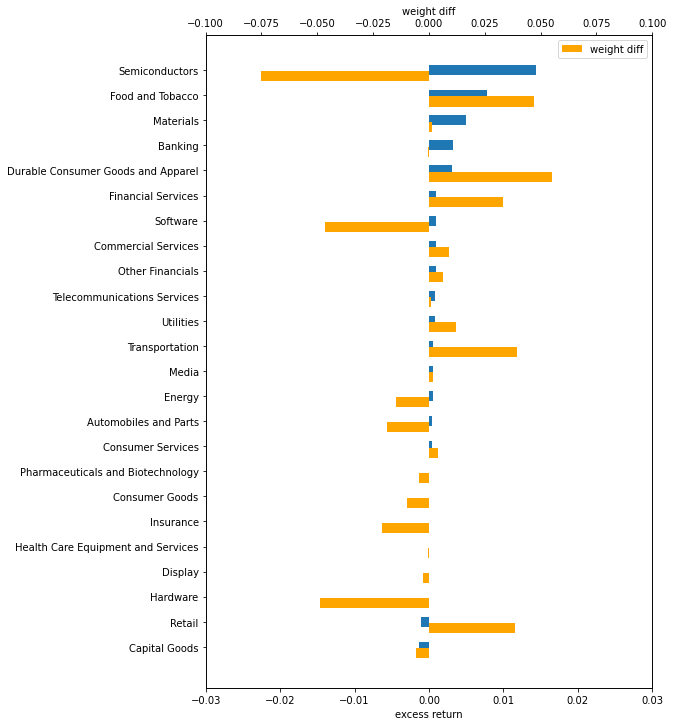

In [161]:
compare_sec_diff= pd.concat([port_sector_ret_ls[-1], sector_weight_diff_ls[-1]], axis=1)
compare_sec_diff=compare_sec_diff.dropna()

new_idx=[]
for item in compare_sec_diff.index:
    new_idx.append(sector_dict[item])
compare_sec_diff.index = new_idx

compare_sec_diff=compare_sec_diff.sort_values(compare_sec_diff.columns[0], ascending=False)

fig, ax1 = plt.subplots(figsize = (8, 12))
ax2=ax1.twiny()

y_pos = np.arange(len(compare_sec_diff.index)*2, step=2)


ax1.barh(y_pos, compare_sec_diff.iloc[:, 0], align='center', label='excess return')
ax1.set_yticks(y_pos, labels=compare_sec_diff.index)
ax1.set_xlim(-0.03, 0.03)
ax1.invert_yaxis()  # labels read top-to-bottom
ax1.set_xlabel('excess return')

ax2.barh(y_pos+.5, compare_sec_diff.iloc[:, 1], align='center', label='weight diff', color='orange')
ax2.set_xlim(-0.1, 0.1)
ax2.set_xlabel('weight diff')


plt.legend()
plt.show()

In [229]:
compare_sec_diff

,2023-10-31 00:00:00,weight_diff
Semiconductors,0.014374,-0.075304
Food and Tobacco,0.007791,0.047072
Materials,0.004971,0.001364
Banking,0.003212,-0.000228
Durable Consumer Goods and Apparel,0.003145,0.055068
Financial Services,0.000966,0.033180
Software,0.000958,-0.046404
Commercial Services,0.000904,0.008992
Other Financials,0.000893,0.006196
Telecommunications Services,0.000874,0.001092


### stock contribution

In [164]:
cap_combined

KSECapSize  idx_weight FG_IndustryGroup_Idx  weight  ret  \
Dates                                                                         
2023-01-02 A005930    코스피 대형주      0.2800                  반도체     NaN  NaN   
           A373220    코스피 대형주      0.0167                 하드웨어     NaN  NaN   
           A000660    코스피 대형주      0.0454                  반도체     NaN  NaN   
           A207940    코스피 대형주      0.0139             제약 및 바이오     NaN  NaN   
           A051910    코스피 대형주      0.0296                   소재     NaN  NaN   
...                       ...         ...                  ...     ...  ...   
2023-11-07 A375500        NaN      0.0010                  NaN     NaN  NaN   
           A377300        NaN      0.0027                  NaN     NaN  NaN   
           A381970        NaN      0.0001                  NaN     NaN  NaN   
           A383220        NaN      0.0014                  NaN     NaN  NaN   
           A402340        NaN      0.0043                  NaN     NaN  NaN   

                    weighted_ret  idx_weight_ret  
Dates                                             
2023-01-02 A005930           NaN             NaN  
           A373220           NaN             NaN  
           A000660           NaN             NaN  
           A207940           NaN             NaN  
           A051910           NaN             NaN  
...                          ...             ...  
2023-11-07 A375500           NaN             NaN  
           A377300           NaN             NaN  
           A381970           NaN             NaN  
           A383220           NaN             NaN  
           A402340           NaN             NaN  

[569368 rows x 7 columns]

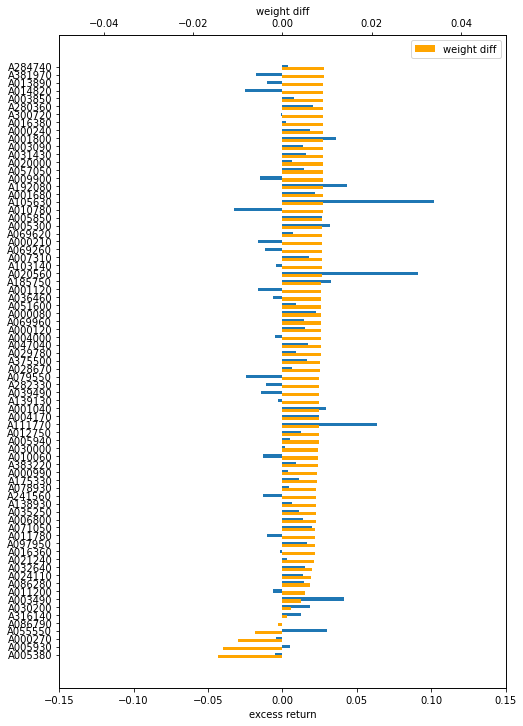

In [162]:
stock_diff=cap_combined.loc[eom[-1], ['ret', 'weight', 'idx_weight', 'idx_weight_ret']]
stock_diff=stock_diff[stock_diff['weight']>0]
stock_diff['weight_diff']=stock_diff['weight']-stock_diff['idx_weight']
stock_diff=stock_diff[['ret', 'weight_diff']]
stock_diff=stock_diff.sort_values('weight_diff', ascending=False)

fig, ax1 = plt.subplots(figsize = (8, 12))
ax2=ax1.twiny()

y_pos = np.arange(len(stock_diff.index)*2, step=2)

ax1.barh(y_pos, stock_diff.iloc[:, 0], align='center', label='excess return')
ax1.set_yticks(y_pos, labels=stock_diff.index)
ax1.set_xlim(-0.15, 0.15)
ax1.invert_yaxis()  # labels read top-to-bottom
ax1.set_xlabel('excess return')

ax2.barh(y_pos+.5, stock_diff.iloc[:, 1], align='center', label='weight diff', color='orange')
ax2.set_xlim(-0.05, 0.05)
ax2.set_xlabel('weight diff')


plt.legend()
plt.show()

In [211]:
stock_diff=pd.concat([stock_diff, stock_names], axis=1).dropna()

In [222]:
top_stocks=stock_diff.sort_values('ret', ascending=False).head(10)
bottom_stocks=stock_diff.sort_values('ret').head(10)

In [223]:
top_stocks

,ret,weight_diff,Name
A105630,0.101665,0.008996,한세실업
A020560,0.091399,0.008796,아시아나항공
A111770,0.063298,0.008196,영원무역
A192080,0.043392,0.008996,더블유게임즈
A003490,0.041123,0.004196,대한항공
A001800,0.036166,0.009096,오리온홀딩스
A185750,0.032501,0.008696,종근당
A005300,0.032025,0.008896,롯데칠성
A055550,0.030034,-0.006104,신한지주
A001040,0.029132,0.008196,CJ


In [224]:
bottom_stocks

,ret,weight_diff,Name
A010780,-0.032754,0.008996,아이에스동서
A014820,-0.024802,0.009196,동원시스템즈
A079550,-0.024465,0.008296,LIG넥스원
A381970,-0.018013,0.009296,케이카
A000210,-0.016487,0.008896,DL
A001120,-0.016425,0.008696,LX인터내셔널
A009900,-0.015131,0.008996,명신산업
A039490,-0.014451,0.008296,키움증권
A010060,-0.013100,0.007896,OCI홀딩스
A241560,-0.012957,0.007596,두산밥캣


In [225]:
bottom_wdiff_stocks=stock_diff.sort_values('weight_diff').head(10)

In [228]:
bottom_wdiff_stocks[['weight_diff', 'Name']]

,weight_diff,Name
A005380,-0.014504,현대차
A005930,-0.013200,삼성전자
A000270,-0.009904,기아
A055550,-0.006104,신한지주
A086790,-0.001004,하나금융지주
A316140,0.001096,우리금융지주
A030200,0.001996,KT
A003490,0.004196,대한항공
A011200,0.005096,HMM
A086280,0.006196,현대글로비스


In [165]:
mlq_w

,code,weights,name
dates,,,
2023-02-28,A001040,0.009461,CJ
2023-02-28,A096770,0.009461,SK이노베이션
2023-02-28,A006260,0.009461,LS
2023-02-28,A011790,0.009461,SKC
2023-02-28,A016380,0.009461,KG스틸
...,...,...,...
2023-10-31,A006800,0.009396,미래에셋증권
2023-10-31,A086280,0.009396,현대글로비스
2023-10-31,A178920,0.009396,PI첨단소재


In [166]:
orig_ret_temp=(prc.loc[daily_w.index[0]:].pct_change() * daily_w.fillna(0)).sum(1).loc['2023-08-01':'2023-08-31']

In [167]:
idx_ret.loc['2023-08-1':'2023-08-31']

Dates
2023-08-01    0.017978
2023-08-02   -0.012253
2023-08-03   -0.004254
2023-08-04    0.003830
2023-08-07   -0.002555
2023-08-08   -0.006492
2023-08-09    0.013854
2023-08-10    0.006925
2023-08-11   -0.002789
2023-08-14   -0.007683
2023-08-16   -0.019297
2023-08-17   -0.009090
2023-08-18   -0.006143
2023-08-21    0.003372
2023-08-22   -0.001736
2023-08-23    0.000007
2023-08-24    0.011412
2023-08-25   -0.004765
2023-08-28    0.011912
2023-08-29    0.003767
2023-08-30    0.005127
2023-08-31   -0.001818
dtype: float64

In [168]:
sector_ret_temp=temp_sec_weighted_ret.sum(1)

In [169]:
orig_ret_temp_stocks=(prc.loc[daily_w.index[0]:].pct_change() * daily_w.fillna(0)).loc['2023-08-01':'2023-08-31']
sec_ret_temp=monthly_cap_combined.groupby(['Dates', 'FG_IndustryGroup_Idx']).sum(numeric_only=True)['weighted_ret'].unstack().sum(1)

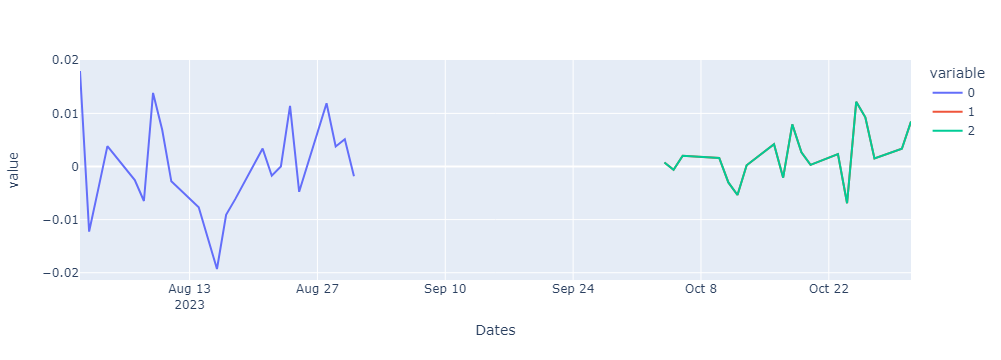

In [170]:
pd.concat([orig_ret_temp_stocks.sum(1), monthly_cap_combined['weighted_ret'].unstack().sum(1), sec_ret_temp], axis=1).plot()

In [171]:
orig_ret_temp

Dates
2023-08-01    0.017978
2023-08-02   -0.012253
2023-08-03   -0.004254
2023-08-04    0.003830
2023-08-07   -0.002555
2023-08-08   -0.006492
2023-08-09    0.013854
2023-08-10    0.006925
2023-08-11   -0.002789
2023-08-14   -0.007683
2023-08-16   -0.019297
2023-08-17   -0.009090
2023-08-18   -0.006143
2023-08-21    0.003372
2023-08-22   -0.001736
2023-08-23    0.000007
2023-08-24    0.011412
2023-08-25   -0.004765
2023-08-28    0.011912
2023-08-29    0.003767
2023-08-30    0.005127
2023-08-31   -0.001818
dtype: float64

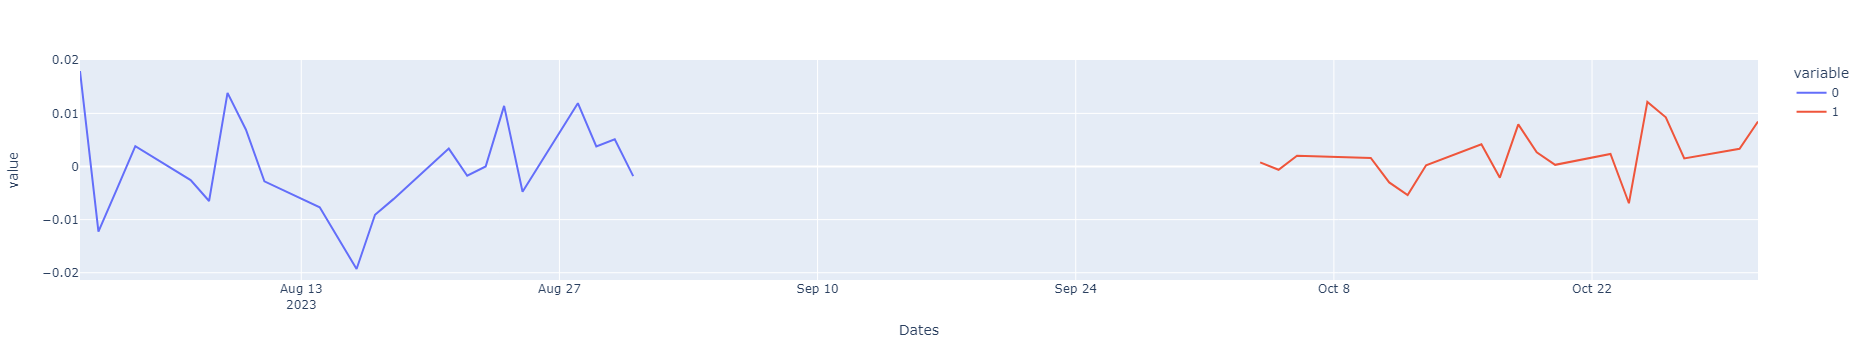

In [172]:
pd.concat([orig_ret_temp, sector_ret_temp], axis=1).plot()

In [173]:
pd.concat(port_sector_ret_ls, axis=1).sum() - pd.concat(bm_sector_ret_ls, axis=1).sum()

2023-02-28   -0.005015
2023-03-31   -0.019742
2023-04-28   -0.013622
2023-05-31   -0.008892
2023-06-30    0.009674
2023-07-31   -0.018510
2023-08-31    0.023469
2023-09-27    0.027892
2023-10-31    0.031644
dtype: float64

In [ ]:
pd.concat(bm_sector_ret_ls, axis=1)

In [ ]:
pd.concat(bm_sector_cap_ls, axis=1).sum()

In [ ]:
pd.concat(port_sector_cap_ls, axis=1).sum()

In [ ]:
pd.concat(sector_weight_diff_ls, axis=1)

In [ ]:
bm_cap_weight.sum(), bm_sector_weight.sum(), port_cap_weight.sum(), port_sector_weight.sum()

In [ ]:
temp_cap_weight=cap_combined.loc[date]
bm_cap_weight=temp_cap_weight[k200comp.loc[date]=='Y']
bm_cap_weight=bm_cap_weight.groupby('KSECapSize').sum(numeric_only=True)['idx_weight']

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

plt.plot(weight_diff_ts['Large'])

ax.set_ylabel('excess weight')
ax.legend(labels = weight_diff_ts.columns,
          fontsize = 12,
          title = "Port Cap changes compared to BM",
          title_fontsize = 14)

ax.legend_.set_bbox_to_anchor([0.5, 1])

ax2=ax.twinx()
ax2.plot(bm_weight_ts.index, bm_weight_ts['Large'], label='bm weight', color='orange')
ax2.set_ylabel('bm weight')

In [ ]:
sector_names=['IT',
            'Consumer Discretionary',
            'Financials',
            'Industrials',
            'Materials',
            'Energy',
            'Utilities',
            'Health Care',
            'Communication Services',
            'Consumer Staples']

In [ ]:
# plt.figure(figsize=(12, 8))
fig, ax = plt.subplots(figsize = (12, 8))

# colors = plt.cm.Set3(np.linspace(0, 1, len(sector_names)*2))
colors = sns.color_palette('Set2') #, n_colors=len(sector_names))

for i, col in enumerate(sector_weight_diff_ts.columns):
    plt.bar(month_endret.index, sector_weight_diff_ts[col], 8) #, color=colors[i]
    
ax.legend(labels = sector_names,
          fontsize = 12,
          title = "sector weight",
          title_fontsize = 18,
          loc='upper left')

ax.legend_.set_bbox_to_anchor([1, 1])

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

plt.plot(sector_weight_diff_ts)

ax.legend(labels = sector_weight_diff_ts.columns,
          fontsize = 12,
          title = "Port Cap changes compared to BM",
          title_fontsize = 14)
ax.legend_.set_bbox_to_anchor([0.5, 1])

In [ ]:
cap.unstack()

In [ ]:
cap.loc[date][k200comp.loc[date]=='Y'].index

In [ ]:
cap.loc[eom[i]:, temp_comp]

In [ ]:
cap_1q=[]
cap_2q=[]
cap_3q=[]
cap_4q=[]

for i, date in enumerate(eom):
    temp_comp=cap.loc[date][k200comp.loc[date]=='Y'].index
    temp_cap=cap[(cap.index.get_level_values(0)==eom[i]) & (cap.index.get_level_values(1).isin(temp_comp))]
    pred_top=daily_w.loc[date][daily_w.loc[date]>0].index.values
    
    real_top1q=temp_cap.sort_values().iloc[:50].index.get_level_values(1)
    real_top2q=temp_cap.sort_values().iloc[50:100].index.get_level_values(1)
    real_top3q=temp_cap.sort_values().iloc[100:150].index.get_level_values(1)
    real_top4q=temp_cap.sort_values().iloc[150:200].index.get_level_values(1)

    top1q=np.intersect1d(real_top1q, pred_top)
    top2q=np.intersect1d(real_top2q, pred_top)
    top3q=np.intersect1d(real_top3q, pred_top)
    top4q=np.intersect1d(real_top4q, pred_top)
    
    cap_1q.append(len(top1q)/len(pred_top))
    cap_2q.append(len(top2q)/len(pred_top))
    cap_3q.append(len(top3q)/len(pred_top))
    cap_4q.append(len(top4q)/len(pred_top))

In [ ]:
cap_dist

In [ ]:
cap_1q

# sector plot

In [ ]:
data_COM['FG_IndustryGroup27']

In [ ]:
sec_ls=[]
sector=data_COM['FG_IndustryGroup27'].copy()

for i, date in enumerate(eom):
    temp_comp=cap.loc[date][k200comp.loc[date]=='Y'].index
    pred_top=daily_w.loc[date][daily_w.loc[date]>0].index.values
    temp_sec=sector[(sector.index.get_level_values(0)==eom[i]) & (sector.index.get_level_values(1).isin(pred_top))]
    sec_ls.append(temp_sec.unstack().T.value_counts())

In [ ]:
sec_df=pd.concat(sec_ls, axis=1).fillna(0).astype(int)
sec_df.columns=eom

In [ ]:
sec_df['sum']=sec_df.sum(1)

In [ ]:
sec_df.sort_values('sum', ascending=False)

In [ ]:
temp_sec_comp=sector[(sector.index.get_level_values(0)==eom[i]) & (sector =='기타자본재')].index.get_level_values(1)

In [ ]:
data_COM[(data_COM.index.get_level_values(0)=='2023-08-31') & (data_COM.index.get_level_values(1).isin(temp_sec_comp))]

### arirang smartbeta index exposure

In [ ]:
sb=pd.read_excel('./data/factor_components.xlsx', sheet_name='Sheet2', index_col=0)
sb.columns=sb.iloc[7]
sb=sb.iloc[13:].dropna()
sb.index=pd.to_datetime(sb.index)
style_ret=pd.concat([sb.pct_change(), idx_ret, bm_ret], axis=1).dropna()
style_excess_ret=style_ret.subtract(style_ret['코스피 200'], axis=0)

factor_corr_ls=[]
for i, date in enumerate(eom):
    if i == len(eom)-1:
        temp_corr=style_excess_ret.loc[eom[i]:].corr()

    else:
        temp_corr=style_excess_ret.loc[eom[i]:eom[i+1]].corr()

    factor_corr_ls.append(temp_corr[0])
    
factor_corr_df=pd.concat(factor_corr_ls, axis=1)
factor_corr_df.columns=eom

factor_corr_df=factor_corr_df.iloc[:-2]

factor_corr_df.index=['lowvol', 'size', 'momentum', 'value', 'quality']
factor_corr_df.T.plot()

## port quartile performance

In [ ]:
pct_1q=[]
pct_2q=[]
pct_3q=[]
pct_4q=[]

cap_1q=[]
cap_2q=[]
cap_3q=[]
cap_4q=[]


for i, date in enumerate(eom):
    temp_comp=k200comp.loc[date][k200comp.loc[date]=='Y'].index
    pred_top=daily_w.loc[date][daily_w.loc[date]>0].index.values

    temp_cap=cap[(cap.index.get_level_values(0)==eom[i]) & (cap.index.get_level_values(1).isin(temp_comp))]
    
    if i == len(eom)-1:
        real_top1q=(1+ret.loc[eom[i]:, temp_comp]).cumprod().iloc[-1].sort_values().iloc[:50].index.values
        real_top2q=(1+ret.loc[eom[i]:, temp_comp]).cumprod().iloc[-1].sort_values().iloc[50:100].index.values
        real_top3q=(1+ret.loc[eom[i]:, temp_comp]).cumprod().iloc[-1].sort_values().iloc[100:150].index.values
        real_top4q=(1+ret.loc[eom[i]:, temp_comp]).cumprod().iloc[-1].sort_values().iloc[150:200].index.values        
    else:
        real_top1q=(1+ret.loc[eom[i]:eom[i+1], temp_comp]).cumprod().iloc[-1].sort_values().iloc[:50].index.values
        real_top2q=(1+ret.loc[eom[i]:eom[i+1], temp_comp]).cumprod().iloc[-1].sort_values().iloc[50:100].index.values    
        real_top3q=(1+ret.loc[eom[i]:eom[i+1], temp_comp]).cumprod().iloc[-1].sort_values().iloc[100:150].index.values
        real_top4q=(1+ret.loc[eom[i]:eom[i+1], temp_comp]).cumprod().iloc[-1].sort_values().iloc[150:200].index.values

    top1q=np.intersect1d(real_top1q, pred_top)
    top2q=np.intersect1d(real_top2q, pred_top)
    top3q=np.intersect1d(real_top3q, pred_top)
    top4q=np.intersect1d(real_top4q, pred_top)
    
    pct_1q.append(len(top1q)/len(pred_top))
    pct_2q.append(len(top2q)/len(pred_top))
    pct_3q.append(len(top3q)/len(pred_top))
    pct_4q.append(len(top4q)/len(pred_top))
    

    cap_real_top1q=temp_cap.sort_values().iloc[:50].index.get_level_values(1)
    cap_real_top2q=temp_cap.sort_values().iloc[50:100].index.get_level_values(1)
    cap_real_top3q=temp_cap.sort_values().iloc[100:150].index.get_level_values(1)
    cap_real_top4q=temp_cap.sort_values().iloc[150:200].index.get_level_values(1)

    cap_top1q=np.intersect1d(cap_real_top1q, pred_top)
    cap_top2q=np.intersect1d(cap_real_top2q, pred_top)
    cap_top3q=np.intersect1d(cap_real_top3q, pred_top)
    cap_top4q=np.intersect1d(cap_real_top4q, pred_top)

    cap_1q.append(len(cap_top1q)/len(pred_top))
    cap_2q.append(len(cap_top2q)/len(pred_top))
    cap_3q.append(len(cap_top3q)/len(pred_top))
    cap_4q.append(len(cap_top4q)/len(pred_top))            
    
    
split_pred=pd.DataFrame([pct_1q, pct_2q, pct_3q, pct_4q], columns=eom).T
cap_dist=pd.DataFrame([cap_1q, cap_2q, cap_3q, cap_4q], columns=eom).T

sns.set_theme()
 
# Data
x=split_pred.index
y=split_pred.values.T
 
# Plot
plt.figure(figsize=(12, 6))
plt.stackplot(x, y, labels=['1q', '2q', '3q', '4q'])
plt.legend(loc='upper left')
plt.show()

# Data
x=cap_dist.index
y=cap_dist.values.T
 
# Plot
plt.figure(figsize=(12, 8))
plt.stackplot(x, y, labels=['1q', '2q', '3q', '4q'])
plt.legend(loc='upper left')
plt.show()

# DD plot

In [ ]:
dd_diff_ls=[]
for col in k200_ret_excess.columns:
    midx = (1+ k200_ret_excess[col]).cumprod()*100
    midx = midx.fillna(100)

    dd = (midx / np.maximum.accumulate(midx)-1)
    mdd = min(dd)
    midx_diff = ((1+k200_ret_excess[col]).cumprod()*100).fillna(100)
    dd_diff = (midx_diff / np.maximum.accumulate(midx_diff)-1)
    dd_diff_ls.append(dd_diff)

In [ ]:
(ddd*100).plot.area()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

for ddd in dd_diff_ls:

    # Create an area plot for 'ddd*100'
    (ddd * 100).plot.area(title=ddd.name)


In [ ]:
(dd_diff_ls[0] * 100).plot.area(title=dd_diff_ls[0].name)


In [ ]:
(dd_diff_ls[1] * 100).plot.area(title=dd_diff_ls[1].name)


In [ ]:
(dd_diff_ls[2] * 100).plot.area(title=dd_diff_ls[2].name)

In [ ]:
(dd_diff_ls[3] * 100).plot.area(title=dd_diff_ls[3].name)
